<a href="https://colab.research.google.com/github/tiagoru/Statistics_classes/blob/main/C%C3%B3pia_de_Cofee_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/coffe_data.csv')

df.head(11)

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,1/6/2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,2/6/2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,2/6/2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,2/6/2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,3/6/2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5
5,116739,3/6/2023,12:44:17,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5
6,116853,3/6/2023,13:58:14,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,13,6,5
7,117389,3/6/2023,18:57:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,18,6,5
8,118056,4/6/2023,14:31:43,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Sunday,14,6,6
9,118281,4/6/2023,16:30:33,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Sunday,16,6,6


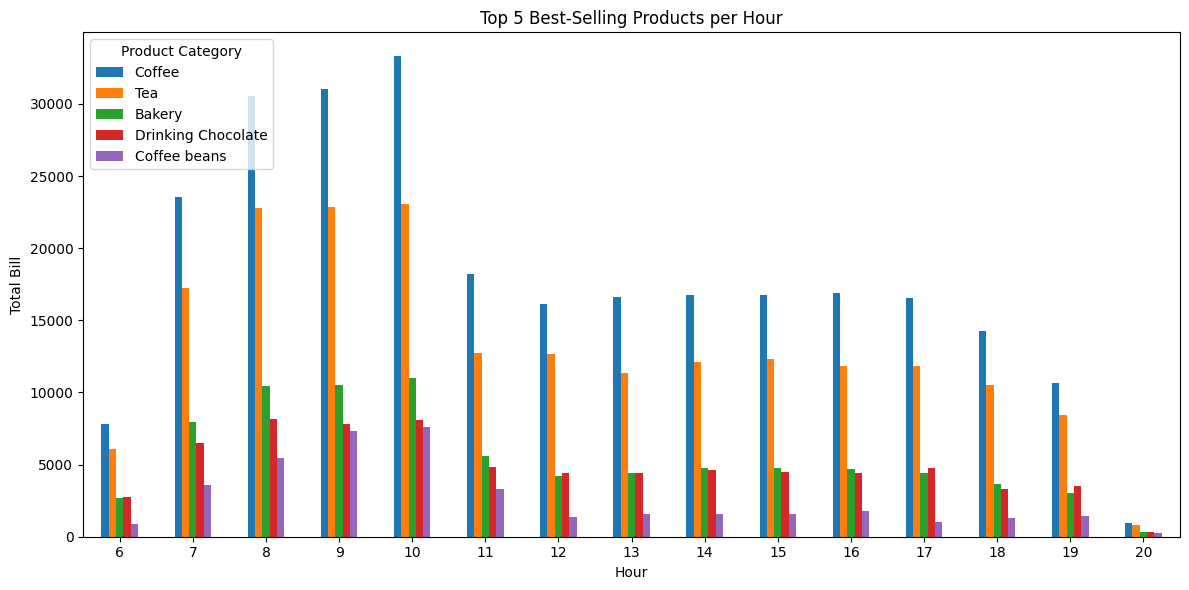

In [ ]:
# Group data by hour and product category
grouped_data = df.groupby(['Hour', 'product_category'])['Total_Bill'].sum()

# Sort each group (hour) by Total_Bill in descending order (top selling first)
sorted_data = grouped_data.sort_values(ascending=False)

# Select the top 5 products per hour (can be adjusted based on your needs)
top_5_per_hour = sorted_data.groupby(level=0).head(5)

# Unstack the DataFrame to get product categories as columns
top_5_per_hour_unstacked = top_5_per_hour.unstack()

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size for better readability
top_5_per_hour_unstacked.plot(kind='bar', stacked=False, ax=ax)
plt.xlabel("Hour")
plt.ylabel("Total Bill")
plt.title("Top 5 Best-Selling Products per Hour")
plt.legend(title="Product Category", loc='upper left')  # Adjust legend position
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

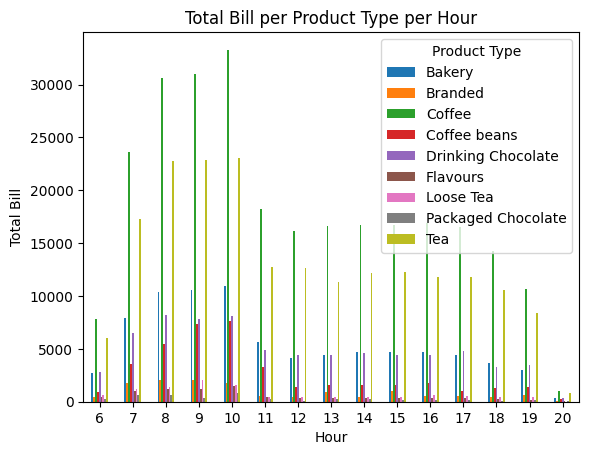

Top-Selling Product(s) per Hour:
Hour
6     Coffee
7     Coffee
8     Coffee
9     Coffee
10    Coffee
11    Coffee
12    Coffee
13    Coffee
14    Coffee
15    Coffee
16    Coffee
17    Coffee
18    Coffee
19    Coffee
20    Coffee
dtype: object


In [ ]:
# Group data by hour and product type
grouped_data = df.groupby(['Hour', 'product_category'])['Total_Bill'].sum()

# Unstack the grouped data to get a DataFrame with product types as columns
unstacked_data = grouped_data.unstack()
#plt.figure(figsize=(20, 16))
# Plot a bar chart for each hour (optional)
unstacked_data.plot(kind='bar', stacked=False)
plt.xlabel("Hour")
plt.ylabel("Total Bill")
plt.title("Total Bill per Product Type per Hour")
plt.legend(title="Product Type", loc='best')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
#plt.tight_layout()  # Adjust spacing for better visualization
plt.show()

# Identify top-selling product(s) per hour (alternative approach)
top_products_per_hour = unstacked_data.idxmax(axis=1)  # Get index of max value in each row (hour)
print("Top-Selling Product(s) per Hour:")
print(top_products_per_hour)  # This will display the product type with the highest total bill for each hour

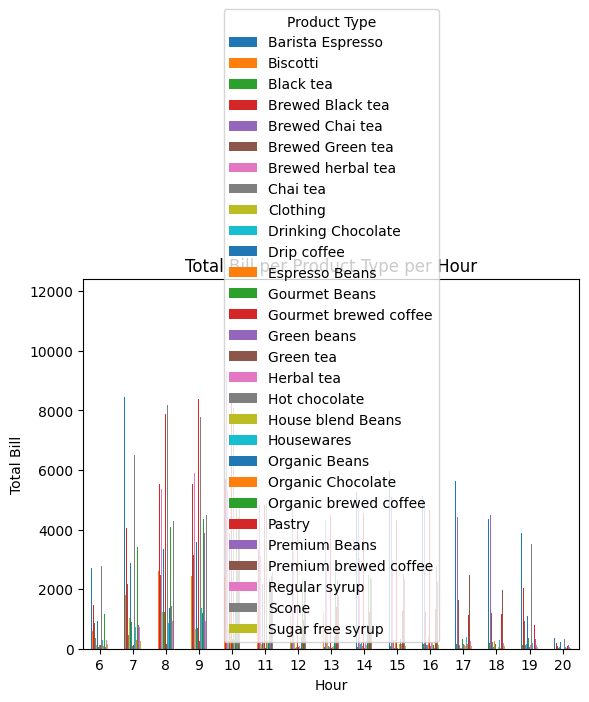

Top-Selling Product(s) per Hour:
Hour
6        Hot chocolate
7     Barista Espresso
8     Barista Espresso
9     Barista Espresso
10    Barista Espresso
11    Barista Espresso
12    Barista Espresso
13    Barista Espresso
14    Barista Espresso
15    Barista Espresso
16    Barista Espresso
17    Barista Espresso
18     Brewed Chai tea
19    Barista Espresso
20    Barista Espresso
dtype: object


In [ ]:
# Group data by hour and product type
grouped_data = df.groupby(['Hour', 'product_type'])['Total_Bill'].sum()

# Unstack the grouped data to get a DataFrame with product types as columns
unstacked_data = grouped_data.unstack()
#plt.figure(figsize=(20, 16))
# Plot a bar chart for each hour (optional)
unstacked_data.plot(kind='bar', stacked=False)
plt.xlabel("Hour")
plt.ylabel("Total Bill")
plt.title("Total Bill per Product Type per Hour")
plt.legend(title="Product Type", loc='lower center')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
#plt.tight_layout()  # Adjust spacing for better visualization
plt.show()

# Identify top-selling product(s) per hour (alternative approach)
top_products_per_hour = unstacked_data.idxmax(axis=1)  # Get index of max value in each row (hour)
print("Top-Selling Product(s) per Hour:")
print(top_products_per_hour)  # This will display the product type with the highest total bill for each hour

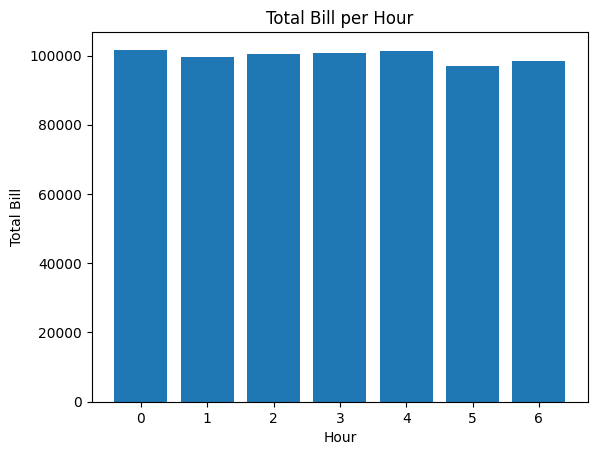

In [ ]:
total_bill_per_hour = df.groupby('Day of Week')['Total_Bill'].sum()

# Plot total bill per hour
plt.bar(total_bill_per_hour.index, total_bill_per_hour.values)
plt.xlabel("Hour")
plt.ylabel("Total Bill")
plt.title("Total Bill per Hour")
plt.show()

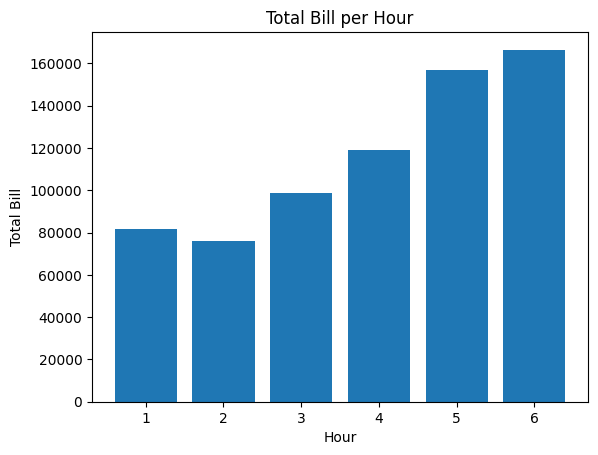

In [ ]:
total_bill_per_hour = df.groupby('Month')['Total_Bill'].sum()

# Plot total bill per hour
plt.bar(total_bill_per_hour.index, total_bill_per_hour.values)
plt.xlabel("Hour")
plt.ylabel("Total Bill")
plt.title("Total Bill per Hour")
plt.show()

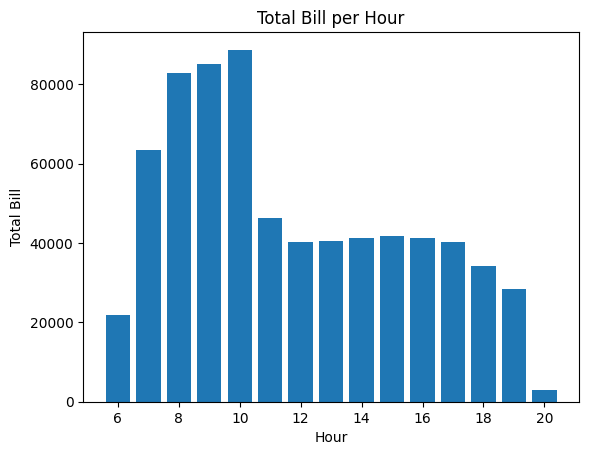

In [ ]:
total_bill_per_hour = df.groupby('Hour')['Total_Bill'].sum()

# Plot total bill per hour
plt.bar(total_bill_per_hour.index, total_bill_per_hour.values)
plt.xlabel("Hour")
plt.ylabel("Total Bill")
plt.title("Total Bill per Hour")
plt.show()


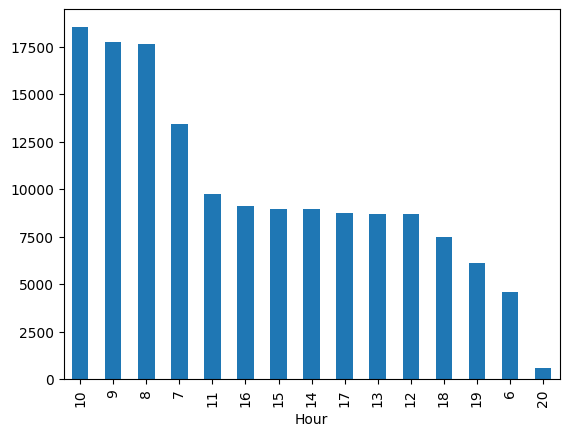

In [ ]:
import matplotlib.pyplot as plt
values_counts = df['Hour'].value_counts()
values_counts.plot(kind ='bar')
plt.show()

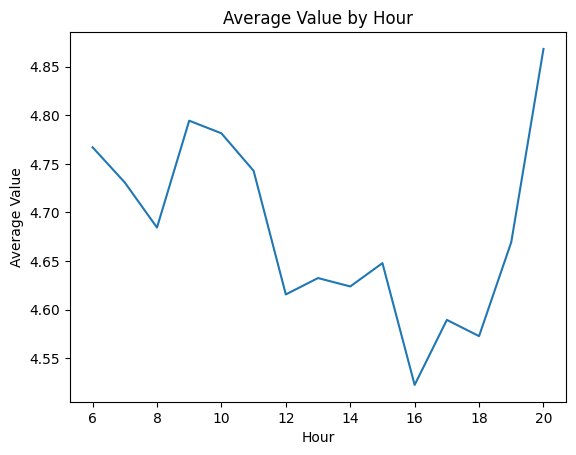

In [ ]:
average_values = df.groupby('Hour')['Total_Bill'].mean()  # Calculate average value per hour

plt.plot(average_values.index, average_values.values)  # Plot hour vs average value
plt.xlabel("Hour")
plt.ylabel("Average Value")
plt.title("Average Value by Hour")
plt.show()

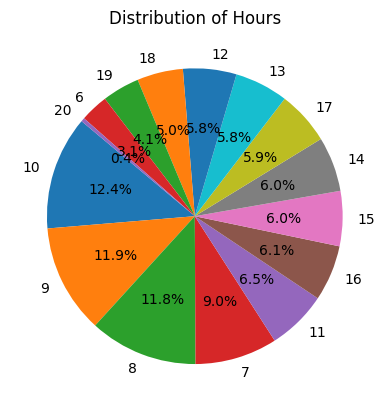

In [ ]:
plt.pie(values_counts, autopct='%1.1f%%', startangle=140, labels=values_counts.index)
plt.title("Distribution of Hours")

# Display the pie chart
plt.show()

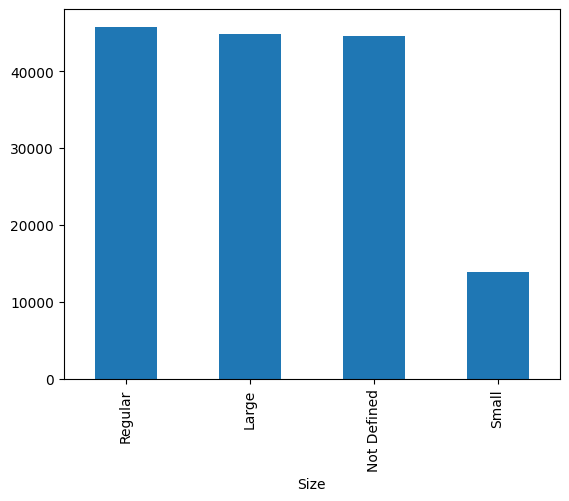

In [ ]:
import matplotlib.pyplot as plt
values_counts = df['Size'].value_counts()
values_counts.plot(kind ='bar')
plt.show()

In [ ]:
df.describe()

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,5.342063,47.918607,1.438276,3.382219,4.686367,11.735790,3.988881,2.982336
std,43153.600016,2.074241,17.930020,0.542509,2.658723,4.227099,3.764662,1.673091,1.996650
min,1.000000,3.000000,1.000000,1.000000,0.800000,0.800000,6.000000,1.000000,0.000000
25%,37335.750000,3.000000,33.000000,1.000000,2.500000,3.000000,9.000000,3.000000,1.000000
50%,74727.500000,5.000000,47.000000,1.000000,3.000000,3.750000,11.000000,4.000000,3.000000
75%,112094.250000,8.000000,60.000000,2.000000,3.750000,6.000000,15.000000,5.000000,5.000000
max,149456.000000,8.000000,87.000000,8.000000,45.000000,360.000000,20.000000,6.000000,6.000000


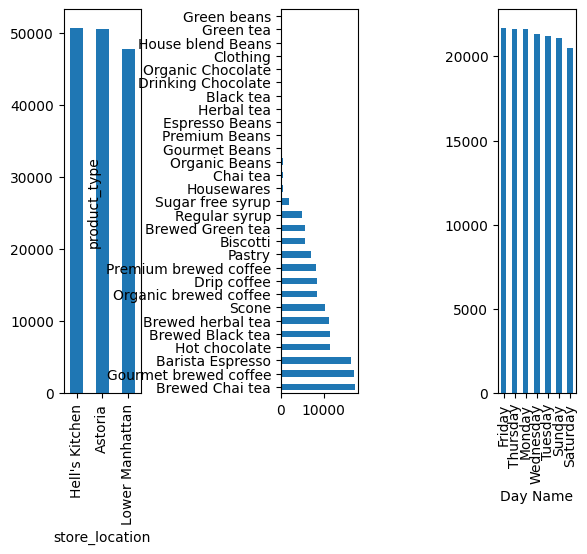

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
#fig.tight_layout()
values_counts = df['store_location'].value_counts()
values_counts.plot(kind ='bar')

plt.subplot(1, 3, 2)
values_counts = df['product_type'].value_counts()
values_counts.plot(kind ='barh')

plt.subplot(1, 3, 3)
values_counts = df['Day Name'].value_counts()
values_counts.plot(kind ='bar')


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1.8,
                    hspace=0.4)
plt.show()

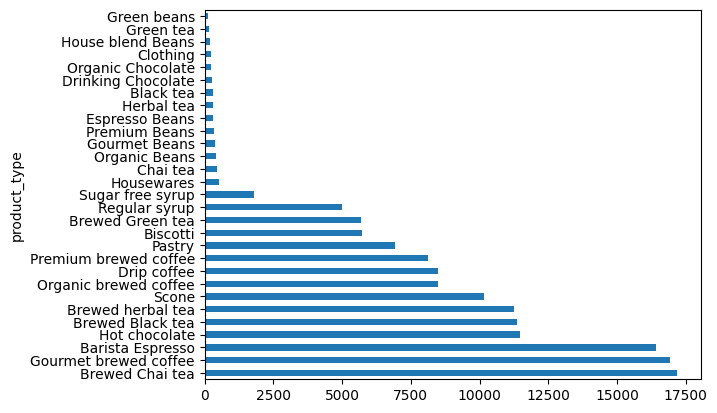

In [ ]:
import matplotlib.pyplot as plt
values_counts = df['product_type'].value_counts()
values_counts.plot(kind ='barh')
plt.show()

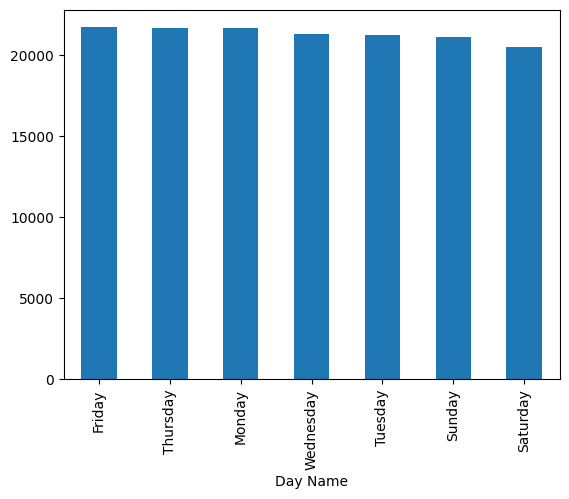

In [ ]:
import matplotlib.pyplot as plt
values_counts = df['Day Name'].value_counts()
values_counts.plot(kind ='bar')
plt.show()

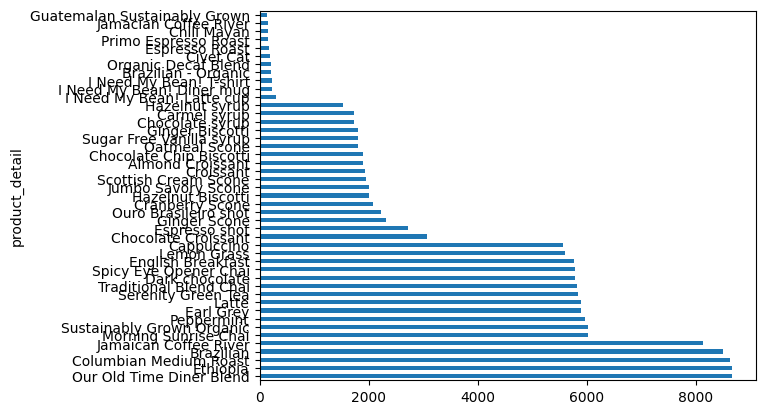

In [ ]:

values_counts = df['product_detail'].value_counts()
values_counts.plot(kind ='barh')
plt.show()